# Predicting heart disease using machine learning model
This model looks into various Python-based machine learning and data science libraries in order to build a machine learning model capable to predicting wether or not someone has heart disease based on their medical attribute.  
I am going to take following approach.
1. problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## Problem Definition
Given medical record about a patient,can we predict wether or not they have heart disease

## Data

Attribute Information:

1.    age: age in years
2.   sex: sex (1 = male; 0 = female)
3.    cp: chest pain type
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic 
4.    trestbps: resting blood pressure (in mm Hg on admission to the
     hospital)
5.    chol: serum cholestoral in mg/dl
6.    fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7.    restecg: resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8.    thalach: maximum heart rate achieved
9.    exang: exercise induced angina (1 = yes; 0 = no)
10.   oldpeak: ST depression induced by exercise relative to rest
11.   slope: the slope of the peak exercise ST segment
          Value 1: upsloping
          Value 2: flat
          Value 3: downsloping
12.    ca: number of major vessels (0-3) colored by flourosopy (for calcification of vessels)
13.    thal: results of nuclear stress test (3 = normal; 6 = fixed defect; 7 = reversable defect)
14.    num: target variable representing diagnosis of heart disease (angiographic disease status) in any major              vessel
        Value 0: < 50% diameter narrowing
        Value 1: > 50% diameter narrowing


# Evaluation
 if we can reach 95% accuracy we will pursue this project in real life 

## We are going to use Numpy,pandas and1 matplotlib for our data analysis

In [6]:
#import all thr tools we need 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   
#we want to draw plot on notebook itself
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
#For model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import plot_roc_curve

In [8]:
#load data 
df=pd.read_csv('7.1 heart-disease.csv')

In [9]:
df.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [10]:
df.shape

(303, 14)

#data analysis using pandas 
#Know about data available to you in order to make a ML model
1. what question are we trying to solve
2. what kind of data do we have and how to treat different kind of data
3. what is missing fro the data and how to deal with it
4. what are the outliers and why shou;d we care about them
5. how can we add and remove some features from our data to get more out of it

In [11]:
df.tail(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
df['target'].value_counts()


1    165
0    138
Name: target, dtype: int64

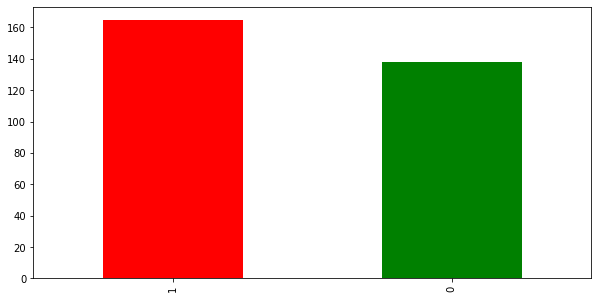

In [13]:
plt.plot(figsize=(20,10))
df['target'].value_counts().plot(kind ='bar',color=['red','green'],figsize=(10,5))
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
#Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


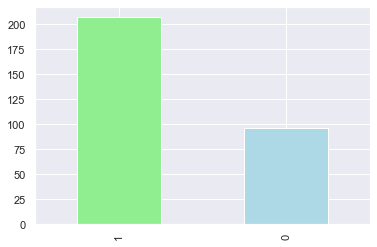

In [17]:
# frequency according to sex
sns.set_theme()
df.sex.value_counts().plot(kind='bar',color=['lightgreen','lightblue']);

In [18]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

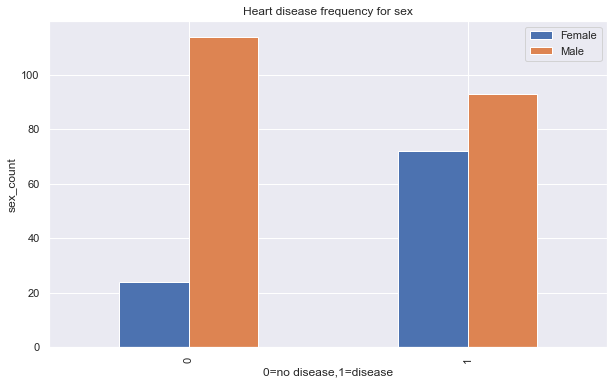

In [19]:
# compare target column with sex column

pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6))
plt.title('Heart disease frequency for sex')
plt.xlabel('0=no disease,1=disease')
plt.ylabel('sex_count')
plt.legend(['Female','Male']);

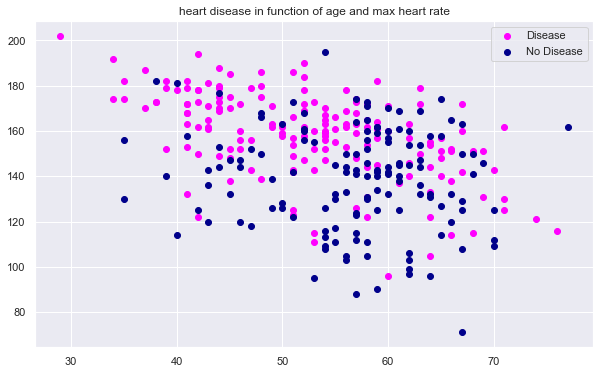

In [20]:
#create another figure for age vs thalach
plt.figure(figsize=(10,6))
#creating a scatter plot for positive targets
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color='fuchsia')
#creating another scatter plot for negetive cases
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color='darkblue')
plt.legend(['Disease','No Disease'])
plt.title('heart disease in function of age and max heart rate')


plt.show()



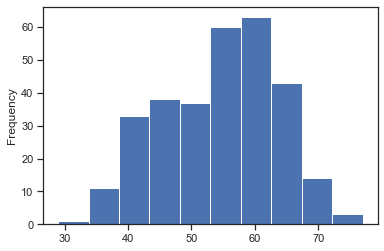

In [21]:
sns.set_theme(style='ticks')
df.age.plot.hist();

# Heart Disease per chest pain type

1. cp: chest pain type
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic 

In [22]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [23]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


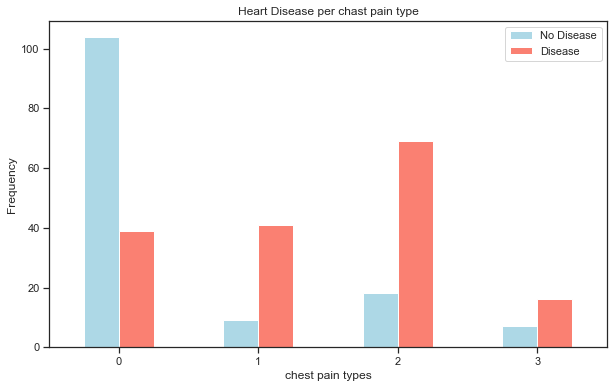

In [24]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['lightblue','salmon'])
plt.title('Heart Disease per chast pain type')
plt.xlabel('chest pain types')
plt.ylabel('Frequency')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0)
plt.show()

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [27]:
#Plot it on a graph so that we can visualize it more throughly
cor_matrix=df.corr()

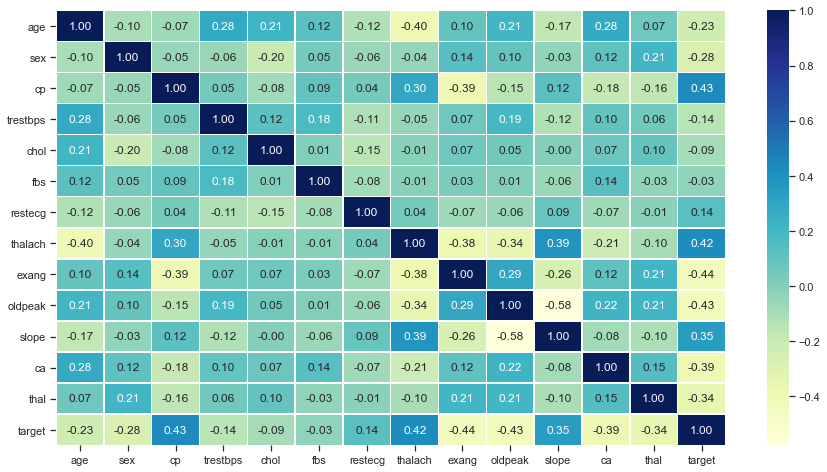

In [28]:
fig,ax=plt.subplots(figsize=(15,8))
ax=sns.heatmap(cor_matrix,annot=True,linewidths=0.5,fmt='0.2f',cmap='YlGnBu')

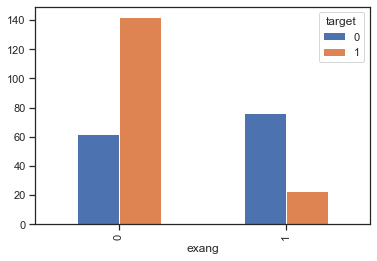

In [29]:
pd.crosstab(df.exang,df.target).plot(kind='bar');


In [30]:
pd.crosstab(df.exang,df.target)

target,0,1
exang,,
0,62,142
1,76,23


In [31]:
cor_matrix['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

In [32]:
matrix=pd.DataFrame(cor_matrix)

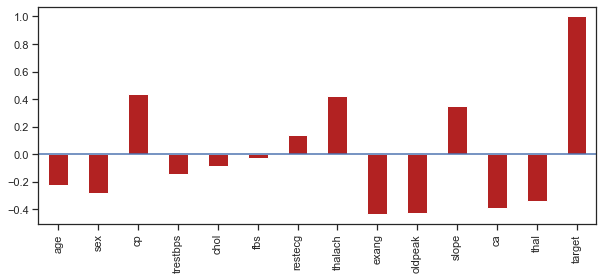

In [33]:
# how each variable correlate with the target variable out of 1
%matplotlib inline
matrix['target'].plot.bar(figsize=(10,4),color='firebrick')
x=[-1,14]
y=[0,0]
plt.plot(x,y)
xlab=ax.get_xticklabels()
lo=ax.get_xticklabels(which='major')
plt.show()


# Modelling

In [34]:
#Split the data into features and target
X=df.drop('target',axis=1)
y=df.target

In [35]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [36]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [37]:
#Split the data into train and test sets
# We want to split our data in way so that we can generate same random data again sometime later
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [38]:
X_train.shape,y_train.shape

((242, 13), (242,))

# Now that we have splitted our data into train and test sets,It's time to choose a model and train it and also test on it

I will try Three different model
1. logistic regression
2. K-NearestNeighbour 
3. RandomForestClassifier

In [39]:
#put the models into dictinary
models={'Logistic Regressio':LogisticRegression(max_iter=1000),
        'KNN':KNeighborsClassifier(),
        'Random Firest':RandomForestClassifier()}

#Also create a function to fit and test 
def fit_and_score(model,X_train,X_test,y_train,y_test):
    """This Function Fits and Evaluate the Models
       models: A dict of three different models
       X_train: Data to traing the models
       y_train:Data for training the model
       X_test:Model testing Data
       y_test:Data for evaluating the model"""
    #Set Random seed to get the same result as before
    np.random.seed(42)
    #create a dictionary for storing the models score
    model_score={}
    #Now Look through each model 
    for name,model in model.items():
        #fit each model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and append the result in model_score
        predict=model.predict(X_test)
        model_score[name]=accuracy_score(y_test,predict)
    return model_score

In [40]:
model_score=fit_and_score(models,X_train,X_test,y_train,y_test)

In [41]:
model_score

{'Logistic Regressio': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Firest': 0.8360655737704918}

# Model comparision

In [42]:
model_compare=pd.DataFrame(model_score,index=['accuracy'])

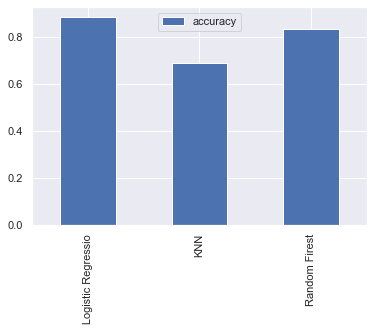

In [43]:
sns.set_theme()
model_compare.T.plot.bar();

Now that we have our base model and their resul we will next go to improve our model by tuning them

Now we will look into the following

1. Hyperparameter tuning
2. feature importance 
3. confusion matrix
4. precision
5. Recall
6. ROC curve
7. F1_score
8. classification report
9. cross_validation
10. Areaunder the curve(AUc)


# Hyperparameter Tuning

In [44]:
#let's tune KNN
train_score=[]
test_score=[]
#create list of N_Neighbour 
neighbors=np.array(range(1,21))
KNN=KNeighborsClassifier()
for i in neighbors:
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    #update the train score list
    train_score.append(KNN.score(X_train,y_train))
    #update the training score list
    test_score.append(KNN.score(X_test,y_test))
    

In [45]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [46]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [47]:
neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

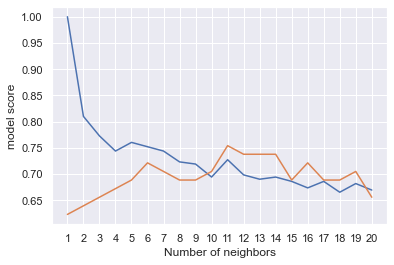

In [48]:
plt.plot(neighbors,train_score,label='training score')
plt.plot(neighbors,test_score,label='test score')
plt.xlabel("Number of neighbors")
plt.xticks(np.arange(1,21,1))
plt.ylabel("model score");

# HyperParameter Tuning with RandomizedSearchCV
1. LogisticRegression model
2. RandomForestClassifier model

In [49]:
#create hyperparameter grid for randomizedsearchCV
logistic_grid={'C':np.logspace(-4,4,20),
               'solver':['liblinear']
    }
Random_grid={
  'n_estimators': np.arange(10,1000,50),
  'max_depth': [None,3,5,10],
   'min_samples_split': np.arange(2,20,2),
   'min_samples_leaf': np.arange(1,20,2)
}

In [50]:
#Tune Logistic regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=logistic_grid,
                             cv=5,n_iter=20,verbose=True)

In [51]:
#fit random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [52]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [53]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [54]:
#fit random hyperparameter search model for logistic regression
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=Random_grid,
                        cv=5,
                        n_iter=20,verbose=True)

In [68]:
rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [56]:
#Find the best Hyperparameter
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 10,
 'min_samples_leaf': 11,
 'max_depth': 3}

In [57]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [58]:
model_score

{'Logistic Regressio': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Firest': 0.8360655737704918}

# Hyperparameter Tuning using GridSearchCV
    Since Logistic regression is performing better that other two models

In [59]:
log_grid={'C': np.logspace(-4,4,30),
          'solver': ['liblinear']
    
}
gs_cv=GridSearchCV(LogisticRegression(),param_grid=log_grid,
                  cv=5,
                  verbose=True)

In [60]:
gs_cv.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [69]:
gs_cv.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [71]:
#Evaluate Grid Search regression model
gs_cv.score(X_test,y_test)

0.8852459016393442

In [72]:
model_score

{'Logistic Regressio': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Firest': 0.8360655737704918}

In [73]:

predic=gs_cv.predict(X_test)

# Evaluation matrix for classification models
1. ROC curve
2. confusion matrix
3. f1_score
4. recall
5. precision

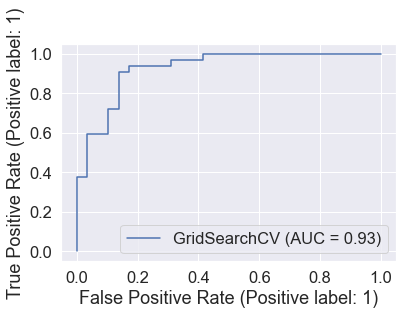

In [74]:
plot_roc_curve(gs_cv,X_test,y_test);

In [75]:
confusion_matrix(y_test,predic)

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [76]:
sns.set(font_scale=1.5)
def plot_heatmap(y_test,predic):
    """plot a nice looking heatmap using confusion matrix"""
    fig,ax=plt.subplots(figsize=(10,6))
    sns.heatmap(confusion_matrix(y_test,predic),annot=True)
    plt.xlabel('True labels')
    plt.ylabel('predicted value')
     

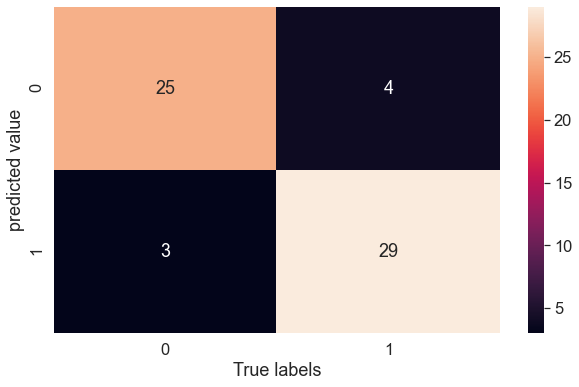

In [77]:
plot_heatmap(y_test,predic)

# Now let's get classification report

In [78]:
print(classification_report(y_test,predic))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculate evaluation matrix using cross validated score

In [79]:
acc=cross_val_score(gs_cv,X,y,scoring='accuracy',cv=5)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [80]:
np.mean(acc)

0.8413661202185793

In [81]:
cv_precision=cross_val_score(gs_cv,X,y,scoring='precision',cv=5)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [82]:
np.mean(cv_precision)

0.82

In [83]:
np.random.seed(100)
recall=cross_val_score(gs_cv,X,y,scoring='recall',cv=5)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [84]:
np.round(np.mean(recall),2)

0.92

In [85]:
F1_score=cross_val_score(gs_cv,X,y,scoring='f1',cv=5)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [86]:
np.mean(F1_score)

0.86406124093473

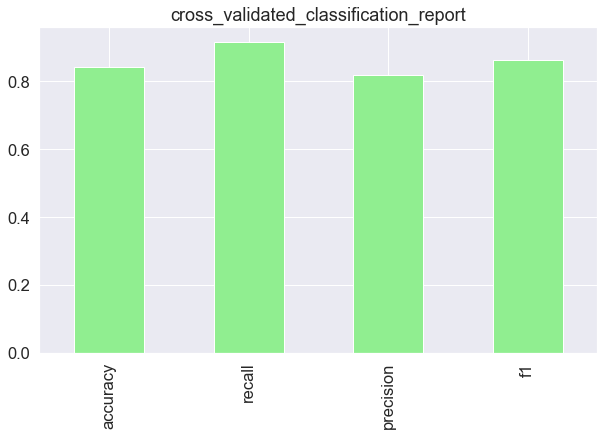

In [87]:
cross_val=pd.DataFrame({'accuracy': acc.mean(),
                        'recall': recall.mean(),
                        'precision': cv_precision.mean(),
                       'f1': F1_score.mean()},index=[0])
cross_val.T.plot.bar(figsize=(10,6),legend=False,color='lightgreen',title='cross_validated_classification_report');

In [88]:
import pickle

In [89]:
pickle.dump(gs_cv,open('Heart_Disease_classification_model.APK','wb'))

In [90]:
loaded_model=pickle.load(open('Heart_Disease_classification_model.APK','rb'))

In [91]:
loaded_model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

# Fearure Importance

In [92]:
#Which feature contributed the most to the outcome of the model and how did they contribute
#Finding feature importance is different for different models
gs_cv.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [94]:
clf=LogisticRegression(C=0.20433597178569418,solver='liblinear')

In [95]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [101]:
cl=clf.coef_

In [99]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))

In [100]:
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [104]:
cl[0]

array([ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
        0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
        0.45051628, -0.63609897, -0.67663373])

In [115]:
feature_df=pd.DataFrame(feature_dict,index=[0])

In [116]:
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


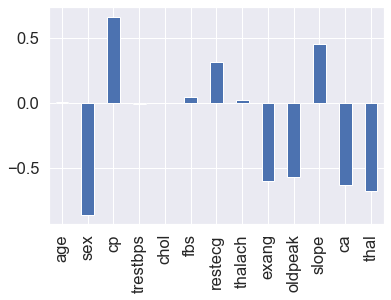

In [117]:
feature_df.T.plot.bar(legend=False);

# experimentation

1. can we collect more data
2. can we try a better model
3. can we improve the current model (beyond what is now!)
4. is our model good enough for the projecdeployment

In [118]:
pickle.dump(gs_cv,open('Heart_Disease_classification _model.pkl','wb'))